# Исследование объявлений о продаже квартир 

##  Изучение данных из файла

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


# Вывод

В датафрейме 23699 строки,присутствуют пропуски данных, аномальные значения данных, необходимо изменить типы данных некоторых столбцов на числовые, целочисленные или булевые.

## Предобработка данных

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

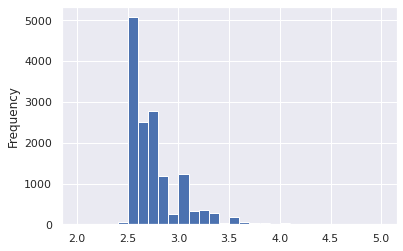

In [4]:
print(data.columns)
#посмотрим значения в столбцах для выявления нестандартных значений на первый взгляд и ошибок, 
#все эти столбца оставляем как есть
data['total_images'].value_counts()
data['ceiling_height'].value_counts()
data['floor'].value_counts()
data['is_apartment'].value_counts()
data['total_area'].value_counts()
data['rooms'].value_counts()
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()

#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

#пропущенные значения в locality_name не будем трогать, причина не понятна
data['locality_name'].value_counts()

#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

#заменим пропуски в balcony на 0 и изменим тип данных на int
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

#посмотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть,
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

#столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
data['is_apartment'] = data['is_apartment'].fillna(False)

#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

#посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
data[data['floors_total'].isna()]

#living_area слишком много знаков после запятой и есть пропущенные значения, 
#можно посчитать средний процент жилой площади от всей площади по всей выборке
#и высчитать для строк с пропусками жилую площадь как вариант но мы не будем тратить на это время
data['living_area'].value_counts()
data['living_area'].describe()

## Расчёты и добавление результатов в таблицу

1. Цена квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [ ]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

## Исследовательский анализ данных

###  Изучим следующие параметры: площадь, цена, число комнат, высота потолков

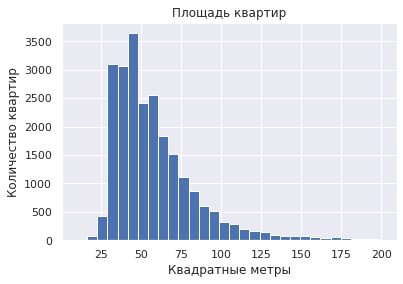

Наибольшие по площади варианты:
19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
4237    517.00
8018    507.00
5893    500.00
15016   500.00
12401   495.00
Name: total_area, dtype: float64


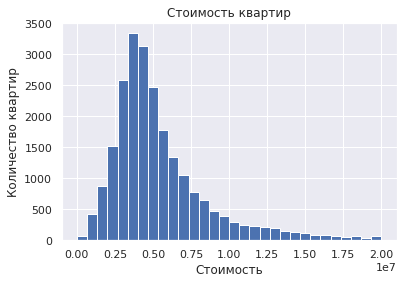

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [6]:
# Работаем с площадью
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

# Работаем со стоимостью
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

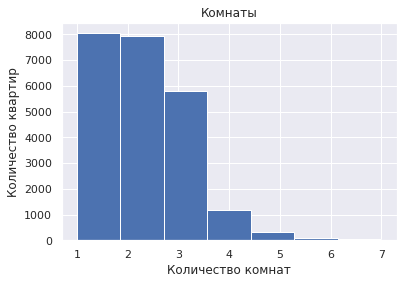

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
4149     10
Name: rooms, dtype: int64


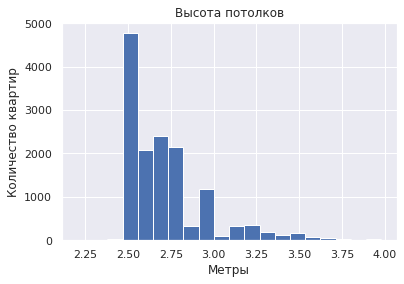

Наибольшие по высоте потолков варианты:
22869   100.00
22336    32.00
3148     32.00
21377    27.50
20478    27.00
5246     27.00
5807     27.00
10773    27.00
17857    27.00
22938    27.00
Name: ceiling_height, dtype: float64


In [7]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

# Работаем с потолками
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))


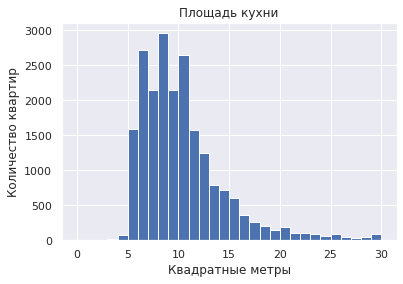

Наибольшие по площади кухни варианты:
19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
10867    87.20
4394     77.00
492      77.00
14644    75.00
Name: kitchen_area, dtype: float64


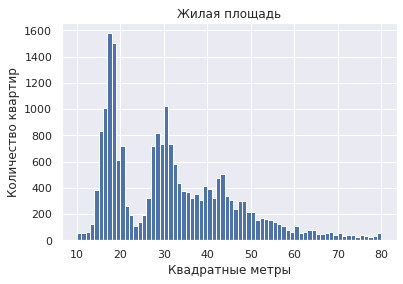

Наибольшие по жилой площади варианты:
19540   409.70
5358    409.00
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
20273   279.60
22494   274.00
Name: living_area, dtype: float64


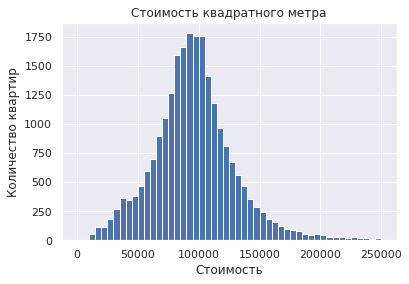

Наибольшие по цене за квадрат варианты:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: sm_price, dtype: int64


In [8]:
# Работаем с площадью кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

# Работаем с жилой площадью
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

# Работаем с ценой за квадрат
plt.hist(data['sm_price'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['sm_price'].sort_values(ascending=False).head(10))

# Вывод
+ Площадь

Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.
Стоимость
В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.
 + Комнаты
 
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.
+ Высота потолков

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.
+ Площадь кухни

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.
+ Жилая площадь

Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.
+ Стоимость квадратного метра

Имеет нормальное распределение с пиком в районе 100,000. Варианты дороже 250,000 являются единичными.



### Изучение времени продажи квартиры

(0.0, 600.0)

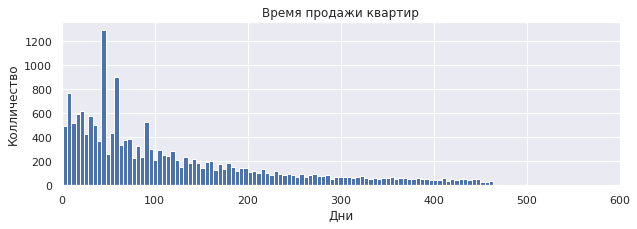

In [116]:
#построим гистрограмму количества дней, за которое продавали квартиры, исключим значение 0,видимо они еще продаются..
data[data['days_exposition']!=0]['days_exposition'].hist(bins=100, figsize=(10, 3))
plt.title("Время продажи квартир")
plt.ylabel("Колличество")
plt.xlabel("Дни")
plt.xlim(0, 600)

In [117]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count   18,496.00
mean       121.92
std        112.05
min          1.00
25%         40.00
50%         82.00
75%        175.00
max        464.00
Name: days_exposition, dtype: float64

## Вывод
Медианное время продажи - 82 дня. Среднее время продажи - 122 дня.
В основном квартиры продаются за срок в 100 дней.

Быстрой продажей можно назвать срок в 40 дней и меньше. Долгой продажей - 175 дней и дольше.

### Убераем редкие и выбивающиеся значения.

In [10]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio
count,"23,699.00","21,638.00","22,459.00","23,699.00","13,676.00","23,613.00","21,023.00","23,699.00","20,219.00","23,699.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","21,677.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00"
mean,9.86,"4,839,969.75",54.36,2.01,2.68,10.67,31.55,5.89,9.50,0.59,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,104.03,"99,421.21",2.57,6.40,"2,017.37",51.51,16.51
std,5.68,"2,217,341.00",19.39,0.99,0.18,6.60,13.94,4.89,3.13,0.96,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,112.14,"50,306.81",1.79,3.49,1.04,18.27,8.79
min,0.00,"12,190.00",12.00,0.00,2.20,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00,111.00,0.00,1.00,"2,014.00",0.00,0.00
25%,6.00,"3,300,000.00",39.40,1.00,2.50,5.00,18.40,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,18.00,"76,585.00",1.00,3.00,"2,017.00",46.00,12.00
50%,9.00,"4,400,000.00",50.10,2.00,2.64,9.00,30.00,4.00,9.00,0.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,61.00,"95,000.00",3.00,6.00,"2,017.00",55.00,16.00
75%,14.00,"6,000,000.00",65.60,3.00,2.76,16.00,41.00,8.00,11.10,1.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,154.00,"114,256.00",4.00,10.00,"2,018.00",63.00,22.00
max,50.00,"11,894,400.00",114.60,5.00,3.21,60.00,77.80,33.00,19.45,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00",464.00,"1,907,500.00",6.00,12.00,"2,019.00",100.00,78.00


# Вывод
В датафрейме отброшены значения на основе 1.5 размаха. Значения получились более адекватны.

### Определение факторов, влияющих на стоимость квартиры

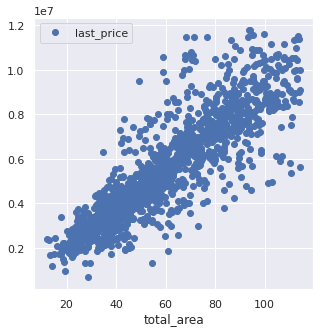

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



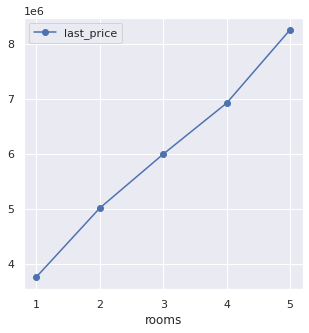

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.54
rooms             0.54   1.00 



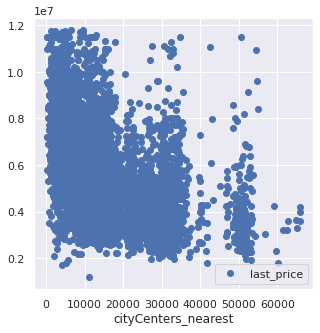

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.71
last_price                          0.71        1.00 



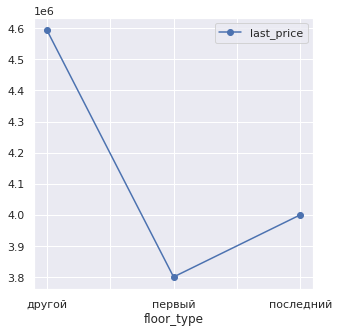

In [11]:
# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

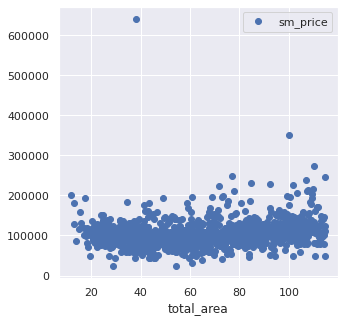

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price        1.00        0.05
total_area      0.05        1.00 



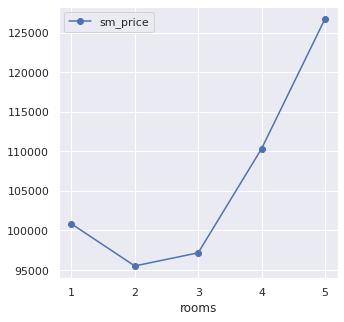

Корреляция цены за квадрат и числа комнат: 

          rooms  sm_price
rooms      1.00     -0.26
sm_price  -0.26      1.00 



In [12]:
# Зависимость цены за квадрат от площади
(
    data.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')


# Вывод
Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоимость достаточно высокая.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.



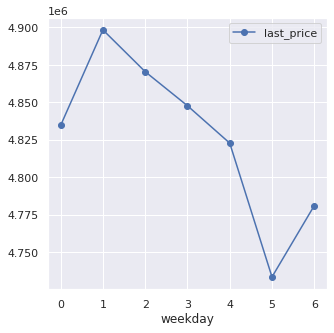

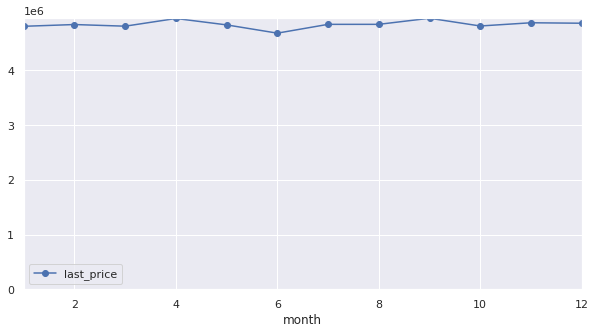

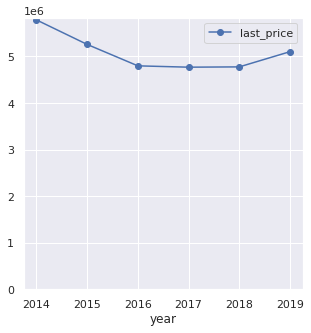

In [13]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(ylim=(0, None),grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(ylim=(0, None),grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Вывод
Зависимость от дня, месяца и года:
+ День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.
+ Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
+ Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться.

### Сравнение средней стоимости квадратного метра в топ-10 городов


In [14]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114848
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85751
посёлок Шушары,78676
Колпино,75424
Гатчина,68745
Всеволожск,68654


# Вывод
Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

### Определяем границу центральной зоны

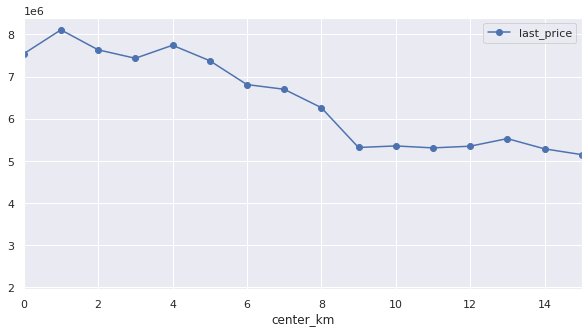

In [15]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

# Вывод
Центральная зона в пределах 7 км. Дальше 7 км средняя цена на квартиры резко снижается.

### Анализ сегмента квартир в центре

Площадь (медиана): 52 

Площадь в центре (медиана): 68 

Площадь (среднее): 57 

Площадь в центре (среднее): 69 



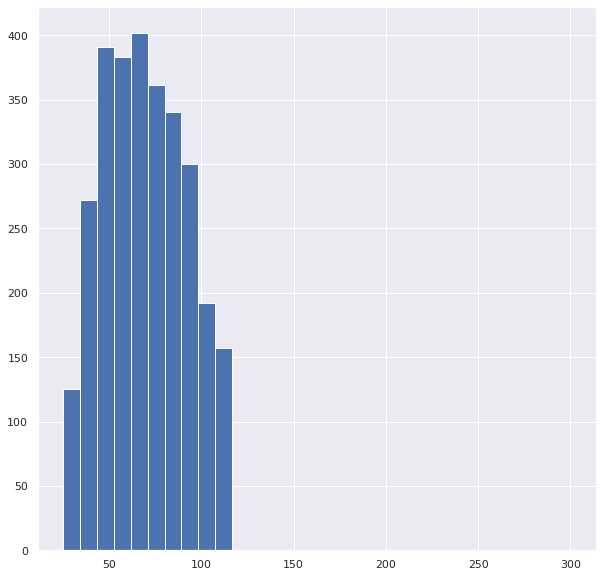

Число вариантов с ценой больше 20 млн: 0


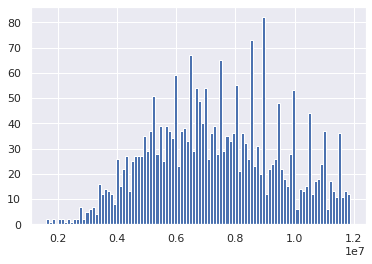

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4937,32.01,581,16.18,12.00
2,5106,33.10,1119,31.17,22.00
3,4123,26.73,1165,32.45,28.00
4,968,6.28,504,14.04,52.00
5,291,1.89,221,6.16,76.00


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 3.0 

Высота потолков (среднее): 2.7034413431718534 

Высота потолков в центре (среднее): 2.904513224535734 



In [16]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')

# Изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

# Работаем со стоимостью
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

# Изучаем число комнат
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

# Изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

# Вывод
Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).

+ Комнаты.
В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Высота потолков в центре выше в среднем на 12 сантиметров.

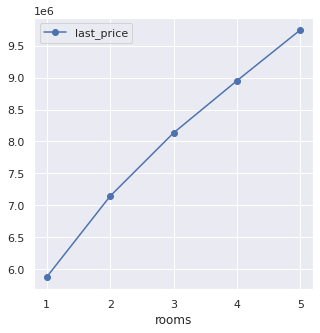

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00  -0.13
rooms            -0.13   1.00 



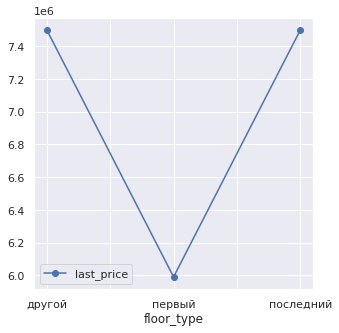

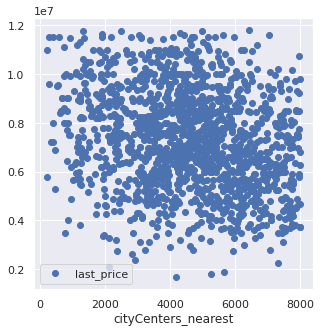

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.14
last_price                          0.14        1.00 



In [17]:
# Зависимость цены от числа комнат
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость цены от удалённости от центра
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

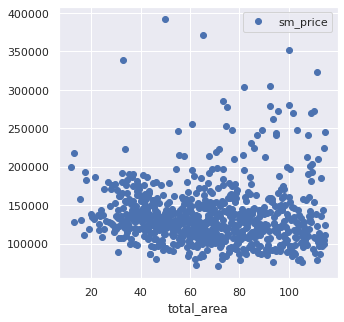

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price        1.00       -0.02
total_area     -0.02        1.00 



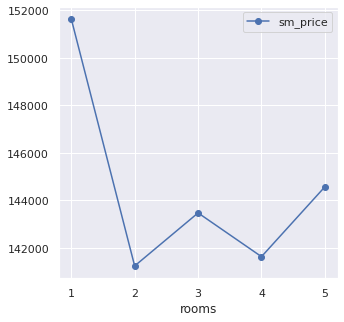

Корреляция цены за квадрат и числа комнат: 

          rooms  sm_price
rooms      1.00     -0.06
sm_price  -0.06      1.00 



In [18]:
# Зависимость цены за квадрат от площади
(
    spb_center.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(spb_center.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    spb_center.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

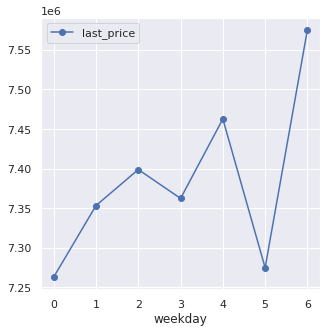

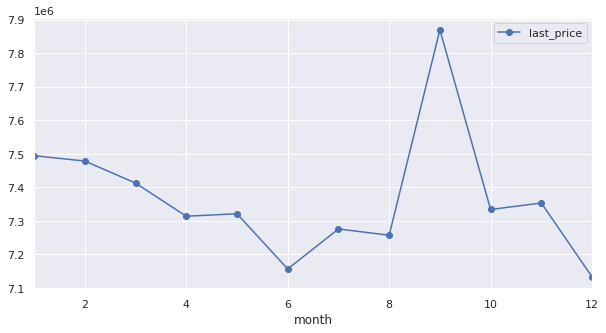

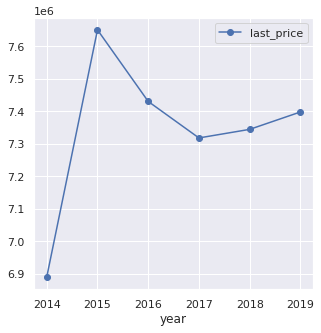

In [19]:
# Зависимость от дня размещения
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Вывод
+ Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу
+ В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
+ В центре есть очень дорогие однокомнатные квартиры
+ В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
+ В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре.
+ Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году.

## Общий вывод

# Срок продажи квартиры

+ Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
+ Есть большое число квартир, проданных всего за несколько дней после публикации.
+ Также есть варианты, которые продавались несколько десятков месяцев.

# Факторы, влияющие на стоимость

+ На стоимость больше влияет площадь квартиры, а не число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но большей площади.
+ Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

# Стоимость квадратного метра в топ-10 населённых пунктов

+ Выше всего стоимость квадратного метра в Санкт-Петербурге - 114848.
+ Ниже всего стоимость квадратного метра в Выборге - 58141.

# Факторы, влияющие на стоимость в центре Санкт-Петербурга

+ В центре города практически нет разницы, насколько квартира удалена от условного центра города.
+ В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
+ В центре есть однокомнатные квартиры с очень высокой стоимостью.
+ Экономическая ситуация в стране мало влияет на элитную недвижимость в центре.